In [66]:
import pandas as pd

In [67]:
data_path = '../ML/data/creditcard.csv'

raw_data = pd.read_csv(data_path)
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [68]:
raw_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [69]:
raw_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

### 데이터(0 : 정상, 1 : 사기) 라벨의 불균형 확인
- 불균형이 심함

In [70]:
frauds_rate = round(raw_data['Class'].value_counts()[1] / 
                    len(raw_data) * 100, 2)
print('Frauds :', frauds_rate, '% of dataset')

Frauds : 0.17 % of dataset


### 그래프 확인

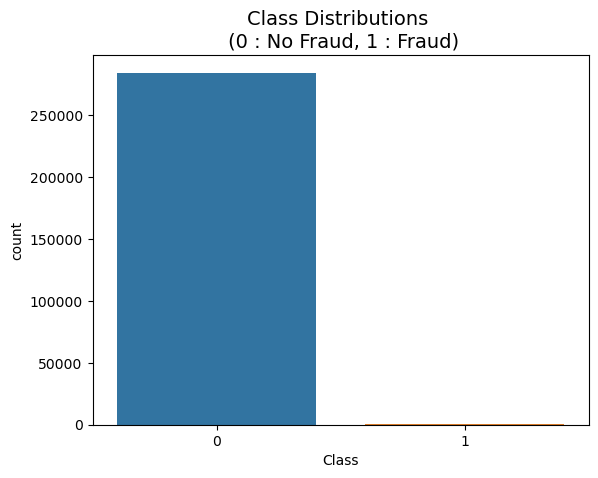

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = 'Class', data=raw_data)
plt.title('Class Distributions \n (0 : No Fraud, 1 : Fraud)', fontsize = 14)
plt.show()

In [72]:
raw_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### 일단 X, y로 데이터 선정
- X : v1~Amount 까지 featuer 설정
- y : Class (0 : 정상, 1 : 사기) label 설정

In [73]:
X = raw_data.iloc[:, 1:-1]
y = raw_data.iloc[:, -1]

X.shape, y.shape

((284807, 29), (284807,))

### 일단 X, y로 데이터 나누기

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)
                                                                                        # stratify= : 데이터의 속성 값들을 동일한 비율로 나누는 설정

### 데이터 불균형 정도 확인

In [75]:
import numpy as np

np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([199020,    344], dtype=int64))

In [76]:
tmp = np.unique(y_train, return_counts=True)[1]
print(tmp)

[199020    344]


In [77]:
print(tmp[1] / len(y_train) * 100, '%')

0.17254870488152324 %


### 분류기 성능 확인 함수

In [78]:
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score)

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)

    return acc, pre, re, f1, auc

### 성능 출력 함수

In [79]:
from sklearn.metrics import confusion_matrix

def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)
    
    print('=>confuxion matrix')
    print(confusion)
    print('=' * 30)
    print('Accuracy : {0:.4f}, Precision : {1:.4f}'.format(acc, pre))
    print('Recall : {0:.4f}, F1 : {1:.4f}, AUC : {2:.4f}'.format(re, f1, auc))


### Logistic Regression

In [80]:
%%time

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=13, solver='liblinear')
                                            # solver = : 최적화 알고리즘 설정, 데이터가 적으면 'liblinear'로 설정
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

print_clf_eval(y_test, lr_pred)

=>confuxion matrix
[[85284    11]
 [   60    88]]
Accuracy : 0.9992, Precision : 0.8889
Recall : 0.5946, F1 : 0.7126, AUC : 0.7972
CPU times: total: 531 ms
Wall time: 7.45 s


### Decision Tree

In [81]:
%%time

from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

=>confuxion matrix
[[85281    14]
 [   42   106]]
Accuracy : 0.9993, Precision : 0.8833
Recall : 0.7162, F1 : 0.7910, AUC : 0.8580
CPU times: total: 234 ms
Wall time: 6.62 s


### Random Forest

In [82]:
%%time

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

=>confuxion matrix
[[85290     5]
 [   38   110]]
Accuracy : 0.9995, Precision : 0.9565
Recall : 0.7432, F1 : 0.8365, AUC : 0.8716
CPU times: total: 9min 31s
Wall time: 1min 5s


### LightGBM
- num_leaves = : Decision tree의 leaf 수 설정
- boost_from_average = : 최초로 만들어진 Tree에서 오류를 보정하면서 지속적으로 Tree를 update 실시, 이때 최초 Tree를 만들때 오류를 update하기 위해 
- 어떤 score값을 만드는데 이때 타겟값의 특정 평균값을 사용할것인지 아닌지를 나타내는 파라미터
- 레이블 값이 극도로 불균형한 분포인 데이터의 경우 boost_from_average = True 값은 재현율과 roc_auc_score를 매우 저하
- 불균형한 데이터 세트에서 예측 성능이 매우 저조할 경우가 발생하므로 LightGBM 객체 생성 시 boost_from_average = False로 파라미터를 설정
- - verbose : 수행 결과 메시지를 출력, -1 설정 시 미출력

In [83]:
%%time

from lightgbm import LGBMClassifier
import warnings

warnings.filterwarnings('ignore')

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1,
                          boost_from_average = False, verbose=-1)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

print_clf_eval(y_test, lgbm_pred)

=>confuxion matrix
[[85289     6]
 [   34   114]]
Accuracy : 0.9995, Precision : 0.9500
Recall : 0.7703, F1 : 0.8507, AUC : 0.8851
CPU times: total: 59.3 s
Wall time: 7.2 s


### Recall과 Precision  비교
- Recall : 실제 True인 것 중에서 모델이 True라고 예측한 것
- Precision : True라고 분류한 것 중에서 실제 True인 것
- 은행입장에선 실제 사기인 것 중에 사기인 것을 색출하는 것을 의미있게 생각하므로 아마 recall 값을 선호할 것이다

### 모델과 데이터를 주면 성능을 출력하는 함수

In [84]:
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    return get_clf_eval(y_test, pred)

### 다수의 모델 성능을 정리해서 DataFrame으로 반환하는 함수

In [85]:
def get_result_pd(models, model_name, X_train, y_train, X_test, y_test):
    col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    tmp = []

    for model in models:
        tmp.append(get_result(model, X_train, y_train, X_test, y_test))

    return pd.DataFrame(data=tmp, columns=col_names, index=model_name)

In [86]:
import time

models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_name = ['RogisticReg', 'DecisionTree', 'RandomForest', 'LightGBM']

start_time = time.time()
results = get_result_pd(models, model_name, X_train, y_train, X_test, y_test)

print('Fit time : ', time.time() - start_time)
results

Fit time :  110.24588966369629


,accuracy,precision,recall,f1,roc_auc
RogisticReg,0.999169,0.888889,0.594595,0.712551,0.797233
DecisionTree,0.999345,0.883333,0.716216,0.791045,0.858026
RandomForest,0.999497,0.956522,0.743243,0.836502,0.871592
LightGBM,0.999532,0.950000,0.770270,0.850746,0.885100


### Amount 확인 시 특정 대역이 아주 많다

<Figure size 800x400 with 0 Axes>

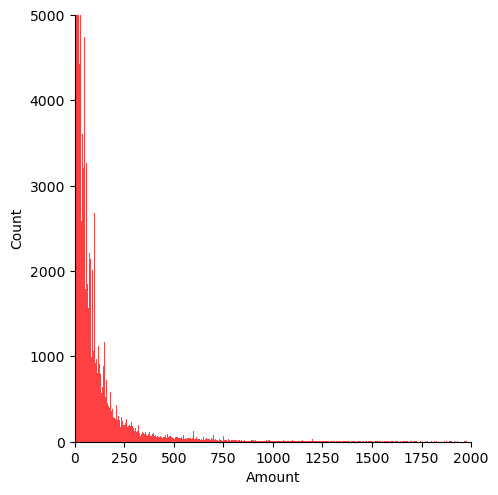

In [87]:
plt.figure(figsize=(8, 4))
sns.displot(data=raw_data, x='Amount', color='r').set(xlim=(0, 2000), ylim=(0, 5000))

plt.show()

### Amount 컬럼에 StandardScaler(정규분포) 설정
- 데이터의 평균을 0, 분산을 1이 되도록 즉, 표준 정규분포를 따르드록 스케일링
- X값에 standard scaled를 설정한 raw_data_copy 적용

### raw_data 슬라이싱

In [88]:
raw_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [89]:
raw_data.iloc[:,1:-2]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533


### reshape
- reshape(행, 열)
- 행(row)의 위치에 -1을 넣고 열의 값을 지정해주면 변환될 배열의 행의 수는 알아서 지정

In [90]:
raw_data['Amount']

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284807, dtype: float64

In [91]:
raw_data['Amount'].values

array([149.62,   2.69, 378.66, ...,  67.88,  10.  , 217.  ])

In [92]:
type(raw_data['Amount'].values)

numpy.ndarray

In [93]:
raw_data['Amount'].values.shape

(284807,)

In [94]:
raw_data['Amount'].values.reshape(-1, 1)

array([[149.62],
       [  2.69],
       [378.66],
       ...,
       [ 67.88],
       [ 10.  ],
       [217.  ]])

In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
amount_n = scaler.fit_transform(raw_data['Amount'].values.reshape(-1, 1))

raw_data_copy = raw_data.iloc[:,1:-2]
raw_data_copy['Amount_Scaled'] = amount_n
raw_data_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


### X값에 standard scaled를 설정한 raw_data_copy 적용 후 데이터 분리 및 성능 확인

In [96]:
X_train, X_test, y_train, y_test = train_test_split(
    raw_data_copy, y, test_size=0.3, random_state=13, stratify=y)
                                                      # stratify= : 데이터의 속성 값들을 동일한 비율로 나누는 설정

In [97]:
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_name = ['RogisticReg', 'DecisionTree', 'RandomForest', 'LightGBM']

start_time = time.time()
results = get_result_pd(models, model_name, X_train, y_train, X_test, y_test)

print('Fit time : ', time.time() - start_time)
results

Fit time :  91.39271640777588


,accuracy,precision,recall,f1,roc_auc
RogisticReg,0.999169,0.888889,0.594595,0.712551,0.797233
DecisionTree,0.999345,0.883333,0.716216,0.791045,0.858026
RandomForest,0.999497,0.956522,0.743243,0.836502,0.871592
LightGBM,0.999520,0.949580,0.763514,0.846442,0.881722


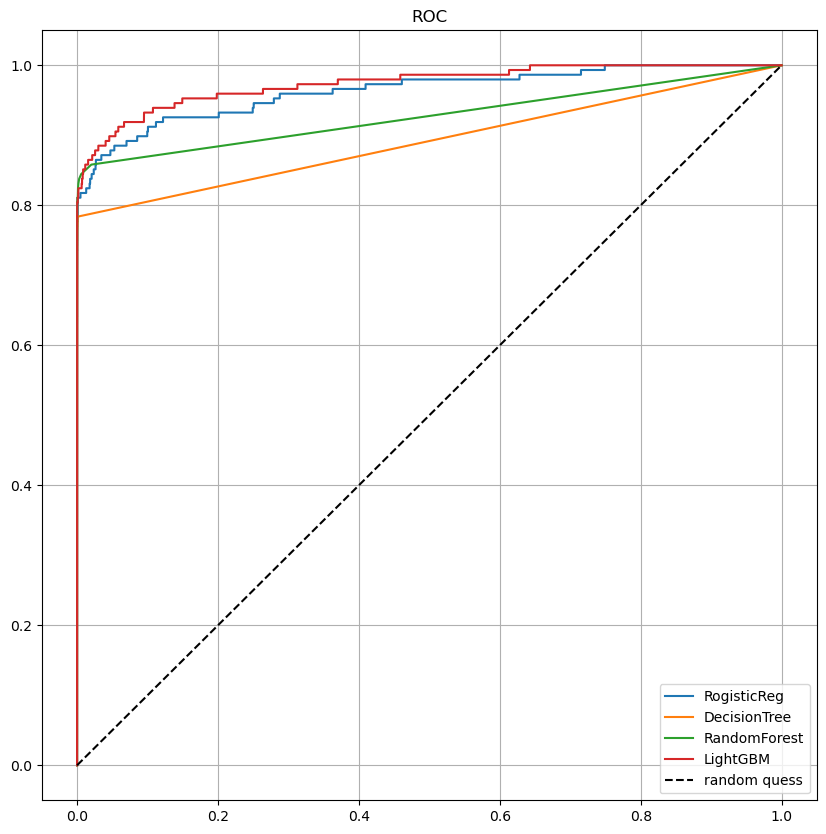

In [98]:
from sklearn.metrics import roc_curve

def draw_roc_curve(models, model_names, X_test, y_test):
    plt.figure(figsize=(10, 10))

    for model in range(len(models)): # len(models) = 4
        pred = models[model].predict_proba(X_test)[:, 1] # models[model] : models 안의 model
        fpr, tpr, thresholds = roc_curve(y_test, pred)
        plt.plot(fpr, tpr, label = model_names[model])

    plt.plot([0, 1], [0, 1], 'k--', label = 'random quess')
    plt.title('ROC')
    plt.legend()
    plt.grid()
    plt.show()

draw_roc_curve(models, model_name, X_test, y_test)

### log sacle 시도
- 큰 수치를 같은 비율의 작은 수치로 변환하는 것(왜도와 첨도를 가진 변수를 정규분포에 가깝게 만들어주는 것)
- 개별 feature, 또는 target의 분포도가 skew(왜도)가 심하면 log 변환
- Standard Scaler는 일반적으로 선형기반의 머신러닝의 입력 (전체) 데이터들에 대해서 다 적용
- Skew(왜도)가 심하면 로그 변환, 전체 데이터의 스케일링을 표준 정규 분포 형태로 맞추고 싶다면 Standard Scaler를 적용
- (선형 기반의 머신러닝의 입력에서 MinMax나 Standard scaler를 선호는 합니다)

In [99]:
amount_log = np.log1p(raw_data['Amount'])

raw_data_copy['Amount_Scaled'] = amount_log
raw_data_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.014760
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.305626
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.939276
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.824306
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.262539


<Figure size 800x400 with 0 Axes>

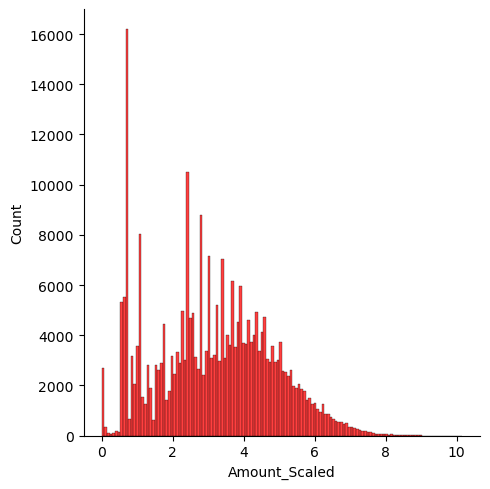

In [100]:
plt.figure(figsize=(8, 4))
sns.displot(data=raw_data_copy, x='Amount_Scaled', color='r')

plt.show()

### log scaled 후 성능 확인
- X값으로 상기에서 log scaled 설정한 raw_data_copy 적용

In [101]:
X_train, X_test, y_train, y_test = train_test_split(raw_data_copy, y, test_size=0.3, random_state=13, stratify=y)

models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_name = ['RogisticReg', 'DecisionTree', 'RandomForest', 'LightGBM']

start_time = time.time()
results = get_result_pd(models, model_name, X_train, y_train, X_test, y_test)

print('Fit time : ', time.time() - start_time)
results

Fit time :  107.76724624633789


,accuracy,precision,recall,f1,roc_auc
RogisticReg,0.999157,0.887755,0.587838,0.707317,0.793854
DecisionTree,0.999345,0.883333,0.716216,0.791045,0.858026
RandomForest,0.999497,0.956522,0.743243,0.836502,0.871592
LightGBM,0.999532,0.950000,0.770270,0.850746,0.885100


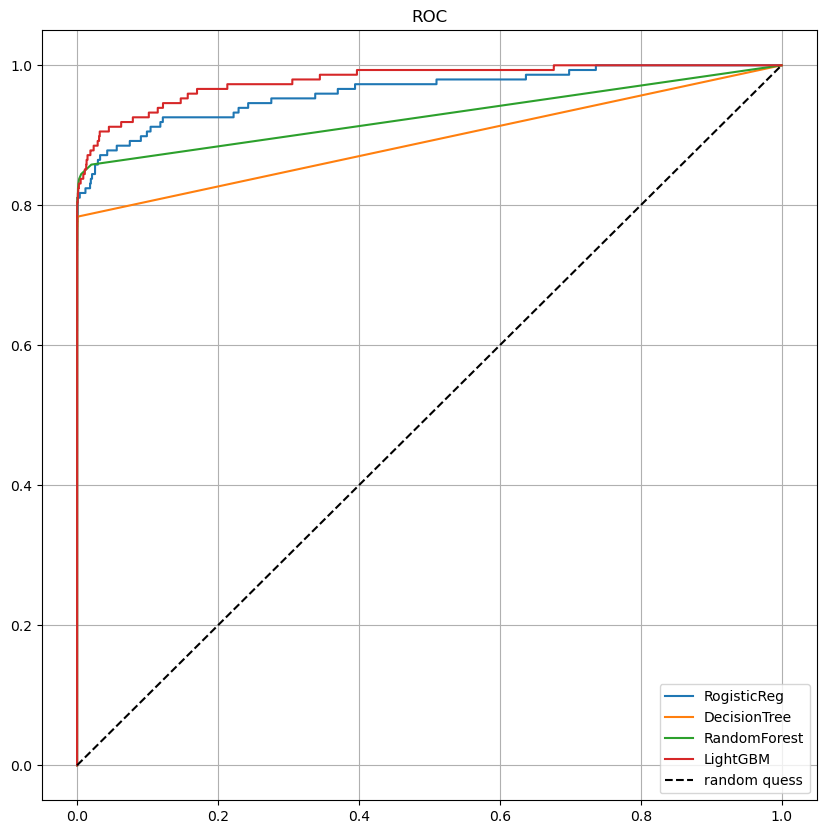

In [102]:
draw_roc_curve(models, model_name, X_test, y_test)

### 특이 데이터

<Axes: >

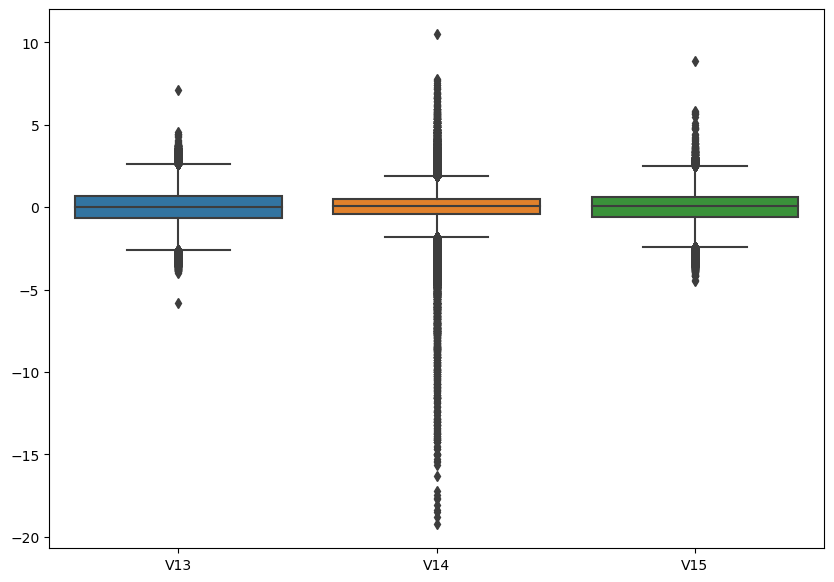

In [103]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=raw_data[['V13', 'V14', 'V15']])

### outlier의 인덱스 파악 코드 작성
- np.percentile(값범위, 백분율 위치) : 0을 최소값, 100을 최대값으로 백분율로 나타낸 특정 위치 값을 찾는 메써드
- | : 파이썬에서 or 의미의 기호

In [104]:
def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df['Class'] == 1][column]
    # 사기(fraud)인 데이터들의 컬럼 가져오기, 사기인 데이터들을 기준으로 outlier를 확인하겠다는 코드
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # fraud.values : numpy array로 변경하기 위해 사용
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    
    return outlier_index

In [105]:
get_outlier(df=raw_data, column='V14', weight=1.5)

Index([8296, 8615, 9035, 9252], dtype='int64')

### outlier 제거

In [106]:
outlier_index = get_outlier(df=raw_data, column='V14', weight=1.5)
raw_data_copy.drop(outlier_index, axis=0, inplace=True)
raw_data_copy.shape

(284803, 29)

### y값에도 outlier를 제거 후 데이터 나누기

In [107]:
X = raw_data_copy

raw_data.drop(outlier_index, axis=0, inplace=True)
y = raw_data.iloc[:, -1] # outlier를 제거 후 다시 슬라이싱

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)


### 성능 재확인

In [108]:
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_name = ['RogisticReg', 'DecisionTree', 'RandomForest', 'LightGBM']

start_time = time.time()
results = get_result_pd(models, model_name, X_train, y_train, X_test, y_test)

print('Fit time : ', time.time() - start_time)
results

Fit time :  96.5769910812378


,accuracy,precision,recall,f1,roc_auc
RogisticReg,0.999286,0.904762,0.650685,0.756972,0.825284
DecisionTree,0.999427,0.870229,0.780822,0.823105,0.890311
RandomForest,0.999497,0.918699,0.773973,0.840149,0.886928
LightGBM,0.999602,0.951613,0.808219,0.874074,0.904074


### ROC 커브

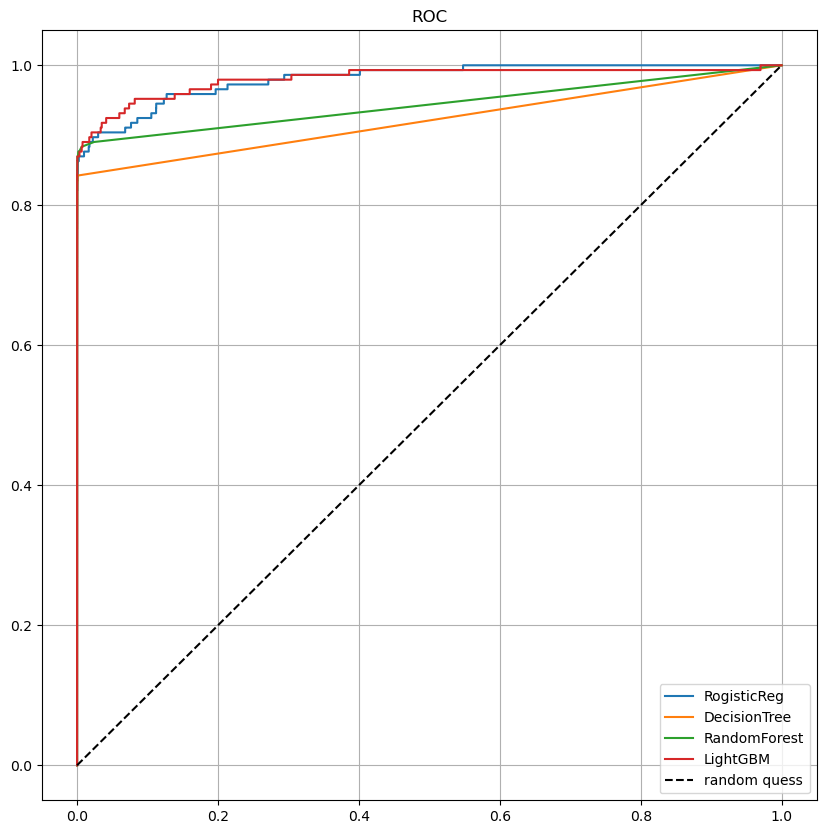

In [109]:
draw_roc_curve(models, model_name, X_test, y_test)

### Undersampling / Oversampling
- sampling = 데이터의 불균형이 극심할 떄 불균형한 두 클래스의 분포를 강제로 맞춰보는 작업
- Undersampling = 많은 수의 데이터를 적은 수의 데이터로 강제로 조정
- Oversampling = 원본데이터의 피처 값들을 아주 약간 변경하여 증식
- SMOTE(synthetic Minority Over-sampling Technique) 대표적인 방법, imbalanced-laern 이라는 python pkg
- 적은 데이터 세트에 있는 개별 데이터를 k_최근접이웃(k_nearist_neighber, knn) 방법으로 찾아서
- 데이터의 분포 사이에 새로운 데이터를 만드는 방식
- train data에서만 적용, 원본 데이터에서 sampling 시 추후 데이터를 나누면서 test data가 오염될 수 있음

In [111]:
from imblearn.over_sampling import SMOTE

smot = SMOTE(random_state=13)
X_train_over, y_train_over = smot.fit_resample(X_train, y_train)

### 데이터 증강 효과

In [115]:
X_train.shape, y_train.shape

((199362, 29), (199362,))

In [116]:
X_train_over.shape, y_train_over.shape

((398040, 29), (398040,))

In [117]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_train_over, return_counts=True))

(array([0, 1], dtype=int64), array([199020,    342], dtype=int64))
(array([0, 1], dtype=int64), array([199020, 199020], dtype=int64))


### 학습 및 성능 검사

In [118]:
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_name = ['RogisticReg', 'DecisionTree', 'RandomForest', 'LightGBM']

start_time = time.time()
results = get_result_pd(models, model_name, X_train_over, y_train_over, X_test, y_test)

print('Fit time : ', time.time() - start_time)
results

Fit time :  166.96409916877747


,accuracy,precision,recall,f1,roc_auc
RogisticReg,0.975609,0.059545,0.897260,0.111679,0.936502
DecisionTree,0.968984,0.046048,0.869863,0.087466,0.919509
RandomForest,0.999532,0.873239,0.849315,0.861111,0.924552
LightGBM,0.999532,0.873239,0.849315,0.861111,0.924552


In [ ]:
draw_roc_curve(models, model_name, X_test, y_test)